# Text Generation

In this example we will train a model using datasets from Kaggle.

# Imports

In [5]:
import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np 

# Datasets

Kaggle provides a multitude of usefull datasets that we can use for our models.

Some examples are:

[Modern Renaissance Poetry](https://www.kaggle.com/ultrajack/modern-renaissance-poetry): Containing a dataset of poetry from Renaissance.

[Poe Short Stories](https://www.kaggle.com/leangab/poe-short-stories-corpuscsv): Containing short stories from Edgar Allan Poe.

[Song Lyrics](https://www.kaggle.com/paultimothymooney/poetry): With various TXT files with lyrics from song of various authors.



### Data used in this example

In this example we will use [lyrics from lady gaga from the Song Lyrics Kaggle dataset](https://www.kaggle.com/paultimothymooney/poetry?select=lady-gaga.txt) that was just mentioned.

In [6]:
tokenizer = Tokenizer()

data = open('/content/lady-gaga.txt').read()

corpus = data.lower().split("\n")

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

print(tokenizer.word_index)
print(total_words)


{'i': 1, 'you': 2, 'the': 3, 'a': 4, 'me': 5, 'my': 6, 'to': 7, 'and': 8, 'oh': 9, "i'm": 10, 'your': 11, 'that': 12, 'love': 13, 'be': 14, 'in': 15, 'on': 16, 'it': 17, "don't": 18, 'want': 19, 'just': 20, 'eh': 21, 'baby': 22, 'with': 23, 'of': 24, 'but': 25, 'we': 26, 'what': 27, 'wanna': 28, 'like': 29, 'do': 30, 'know': 31, 'so': 32, 'is': 33, 'this': 34, "i'll": 35, 'can': 36, "you're": 37, 'not': 38, "can't": 39, 'could': 40, 'p': 41, 'up': 42, 'one': 43, 'no': 44, 'good': 45, 'as': 46, 'got': 47, 'm': 48, 'for': 49, 'if': 50, 'million': 51, "it's": 52, 'way': 53, 'reasons': 54, 'all': 55, 'when': 56, 'heart': 57, 'hair': 58, 'dance': 59, 'gonna': 60, "'cause": 61, 'out': 62, 'la': 63, 'girl': 64, 'show': 65, 'ah': 66, 'face': 67, 'boys': 68, 'need': 69, 'muh': 70, 'touch': 71, 'yeah': 72, 'he': 73, 'was': 74, 'body': 75, 'come': 76, 'ha': 77, 'give': 78, 'down': 79, 'make': 80, 'tell': 81, 'take': 82, "i've": 83, 'were': 84, 'she': 85, 'read': 86, 'see': 87, "won't": 88, 'poker

# Create Training Data

This will split the input text into input sequences. It does it by breaking it into n-grams.


In [7]:
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)

# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]

# created categorigal on-hot encoding labels
ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [8]:
print(tokenizer.word_index)

{'i': 1, 'you': 2, 'the': 3, 'a': 4, 'me': 5, 'my': 6, 'to': 7, 'and': 8, 'oh': 9, "i'm": 10, 'your': 11, 'that': 12, 'love': 13, 'be': 14, 'in': 15, 'on': 16, 'it': 17, "don't": 18, 'want': 19, 'just': 20, 'eh': 21, 'baby': 22, 'with': 23, 'of': 24, 'but': 25, 'we': 26, 'what': 27, 'wanna': 28, 'like': 29, 'do': 30, 'know': 31, 'so': 32, 'is': 33, 'this': 34, "i'll": 35, 'can': 36, "you're": 37, 'not': 38, "can't": 39, 'could': 40, 'p': 41, 'up': 42, 'one': 43, 'no': 44, 'good': 45, 'as': 46, 'got': 47, 'm': 48, 'for': 49, 'if': 50, 'million': 51, "it's": 52, 'way': 53, 'reasons': 54, 'all': 55, 'when': 56, 'heart': 57, 'hair': 58, 'dance': 59, 'gonna': 60, "'cause": 61, 'out': 62, 'la': 63, 'girl': 64, 'show': 65, 'ah': 66, 'face': 67, 'boys': 68, 'need': 69, 'muh': 70, 'touch': 71, 'yeah': 72, 'he': 73, 'was': 74, 'body': 75, 'come': 76, 'ha': 77, 'give': 78, 'down': 79, 'make': 80, 'tell': 81, 'take': 82, "i've": 83, 'were': 84, 'she': 85, 'read': 86, 'see': 87, "won't": 88, 'poker

# Training the Model

In [9]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_words, activation='softmax'))
adam = Adam(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
#earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto')
history = model.fit(xs, ys, epochs=100, verbose=1)
#print model.summary()
print(model)



Epoch 1/100
828/828 [==============================] - 10s 12ms/step - loss: 4.7145 - accuracy: 0.2400
Epoch 2/100
828/828 [==============================] - 10s 12ms/step - loss: 2.9427 - accuracy: 0.4549
Epoch 3/100
828/828 [==============================] - 10s 12ms/step - loss: 2.2899 - accuracy: 0.5307
Epoch 4/100
828/828 [==============================] - 10s 12ms/step - loss: 1.9163 - accuracy: 0.5830
Epoch 5/100
828/828 [==============================] - 10s 12ms/step - loss: 1.7144 - accuracy: 0.6129
Epoch 6/100
828/828 [==============================] - 10s 12ms/step - loss: 1.5531 - accuracy: 0.6350
Epoch 7/100
828/828 [==============================] - 10s 12ms/step - loss: 1.4476 - accuracy: 0.6559
Epoch 8/100
828/828 [==============================] - 10s 12ms/step - loss: 1.4075 - accuracy: 0.6633
Epoch 9/100
828/828 [==============================] - 10s 12ms/step - loss: 1.3873 - accuracy: 0.6627
Epoch 10/100
828/828 [==============================] - 10s 12ms/step - l

In [10]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

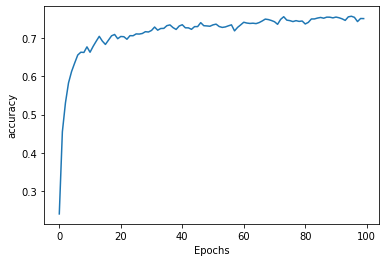

In [11]:
plot_graphs(history, 'accuracy')


# Predict next words

Now the following function uses the trained model to predict the following word taking as seed the previous ones.

In [14]:
seed_text = "I don't know what to tell you now"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

I don't know what to tell you now now i let it in your face i can carry you on my knees and beg you hear me singin' free chorus stop callin' stop callin' control he stunning with two dollars but that's another chapter son of the year i wanna home just change i know i know you know i know you know i know you know that i will please have something the same without the number me told me whatcha got to leave an yeah i'm gon' them gs they be hollerin' stop callin' stop callin' stop callin' anything by how hide the evidence bells got


# Conclusion

Did you get a nice result from this training dataset? Why?
Take a look inside the dataset and try to see its format, and maybe infer the result meaning.
Would it work better with a dataset from a more comple writer (one that don't normally repeat words and beats inside its lyrics)?
Try it out with other datasets!